## Test de normalidad Jarque-Bera
Formulamos las hipótesis

H0: Los datos son normales

H1: Los datos NO son normales

Es una prueba para determinar si un conjunto de valores de datos sigue la distribución normal en función de la asimetría y la curtosis de los datos.
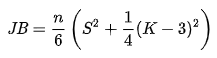
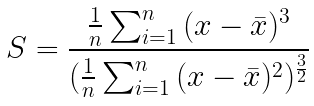
Donde n = el número de valores para los datos. S es la asimetría de la muestra (cuánto se alejan los datos de la media) como se define a continuación:

K es la curtosis de la muestra (cuán gruesas son las colas de la distribución) como se define a continuación:
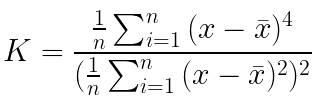
formamos diferentes medidas de la distribución, como:
* Media
* Varianza 
* Asimetría 
* Curtosis

## Propiedades de la medida de asimetría:
* 1 La asimetría cero implica una distribución asimétrica (la distribución t normal)
* 2 La asimetría positiva significa que la distribución tiene una cola derecha larga, es asimétrica a la derecha.
* 3 La asimetría negativa significa que la distribución tiene una cola izquierda larga, es asimétrica a la izquierda
## Propiedades de la medida de curtosis:
* 1 Se dice que una distribución con curtosis=3 es mesocúrtica.
* 2 Una distribución con curtosis>3 se dice que es leptocúrtica o de cola gorda.

El estadístico de Jarque-Bera se distribuye asintóticamente como una distribución chi cuadrado con dos grados de libertad y puede usarse para probar la hipótesis nula de que los datos pertenecen a una distribución normal. La hipótesis nula es una hipótesis conjunta de que la asimetría y el exceso de curtosis son nulos (asimetría = 0 y curtosis = 3)

La prueba de Jarque-Bera utiliza estas dos propiedades (estadísticas) de la
distribución normal, a saber:
La distribución Normal es simétrica alrededor de su media
(sesgo = cero)
La distribución Normal tiene curtosis tres, o
Exceso de curtosis = cero

Sabemos si nuestros datos siguen una distribución normal si la estadística de prueba es cercana a cero y el valor p es mayor que nuestro estándar 0.05. El valor p se relaciona con una hipótesis nula de que los datos siguen una distribución normal. Si la estadística de prueba es grande y el valor p es inferior a 0,05, los datos no siguen una distribución normal.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import scipy
import importlib
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, chi2

### Graficamos un histograma

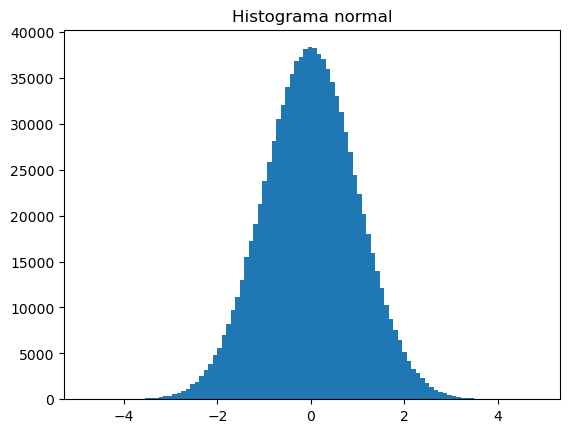

normal
Media: 0.0002524832147766295
Desviación Estandar: 1.0004981588427264
Asimetría: 0.003370191177720437
Curtosis: -0.005942193112117078
VaR 95%: -1.6444886602518165
Jarque-Bera:3.3642672199679295
Valor P: 0.18597675057617868


In [37]:
x_size =10**6
grados_libertad = 2
# student normal exponencial
variabla_aleatoria = "normal"
if variabla_aleatoria == "normal":
 x = np.random.standard_normal(x_size)
 x_str = variabla_aleatoria
elif variabla_aleatoria == "exponencial":
 x = np.random.standard_exponential(x_size)
 x_str = variabla_aleatoria
elif variabla_aleatoria == "student":
 x = np.random.standard_t(size=x_size, df=grados_libertad)
 x_str = x_str = variabla_aleatoria +' (df=' + str(grados_libertad) + ')'
elif variabla_aleatoria == "chi_cuadrada":
 x = np.random.chisquare(size=x_size, df=grados_libertad)
 x_str = x_str = variabla_aleatoria +' (df=' + str(grados_libertad) + ')'
plt.figure()
plt.hist(x, bins=100)
plt.title('Histograma ' + x_str) # Histograma
plt.show()
print(variabla_aleatoria) # Metricas de Riesgo
x_mean = np.mean(x) 
print(f"Media: {x_mean}") # Media
x_stdv = np.std(x) 
print(f"Desviación Estandar: {x_stdv}") # Desviación Estandar
x_skew = skew(x) 
print(f"Asimetría: {x_skew}") # Asimetría
x_kurt = kurtosis(x) # Curtosis 
print(f"Curtosis: {x_kurt}")
x_VaR = x_VaR = np.percentile(x,5)
print(f"VaR 95%: {x_VaR }")
x_jb = x_size/6*(x_skew**2+1/4*x_kurt**2) # Si la Curtosis es en exceso(tiende a 0) es sin -3
print(f"Jarque-Bera:{x_jb}")
Valor_p = Valor_p = 1 - chi2.cdf(x_jb, df= grados_libertad)#Se comprueba la Hipótesis H0
print(f"Valor P: {Valor_p}")
# Suponiendo que tenemos una distribución chi2
# cual es la probabilida de tener puntos que esten a la izquierda de la observación 
